In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import pylab
import pygraphviz
import networkx as nx
import graphviz
warnings.filterwarnings("ignore", category=FutureWarning)

data= pd.read_csv("incidents_datasets_KE.csv")
data_one=pd.read_csv("incidents_datasets_KE.csv")
pd.set_option("display.max_columns",None)
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]
data_not=data_one[cat_cols]

data=data.loc[data['notified'] == 0]

data_cat['notified']=data['notified']
data_cat["overallseverity"] = data["overallseverity"]
data_cat.drop('dstipcategory_dominate', axis=1, inplace=True)
data_cat.drop('srcipcategory_dominate', axis=1, inplace=True)
data_cat = data_cat[data_cat.overallseverity != 2]
data_cat.loc[:, 'ipcategory_scope'].replace(['Internet', 'Private network'], ['Int', 'Priv'], inplace=True)
# data_cat.loc[:,'ipcategory_scope'].replace('Internet', 'Int')
# data_cat['ipcategory_scope'].replace('Private network', 'Priv')
data_cat=data_cat.dropna()

In [56]:
# data.head(63)
weekdays = list(data_cat[0:500].weekday.unique())
ipcategory_scope= list(data_cat[0:500].ipcategory_scope)
ips = list(data_cat[0:500].ip.unique())
alerts = list(data_cat[0:500].alert_ids.unique())
notify_cat=list(data_cat[0:500].notified.unique())
ip_cat_name=list(data_cat[0:500].categoryname.unique())
overallseverity=list(data_cat[0:500].overallseverity.unique())
overallseverity

[3.0, 5.0, 4.0]

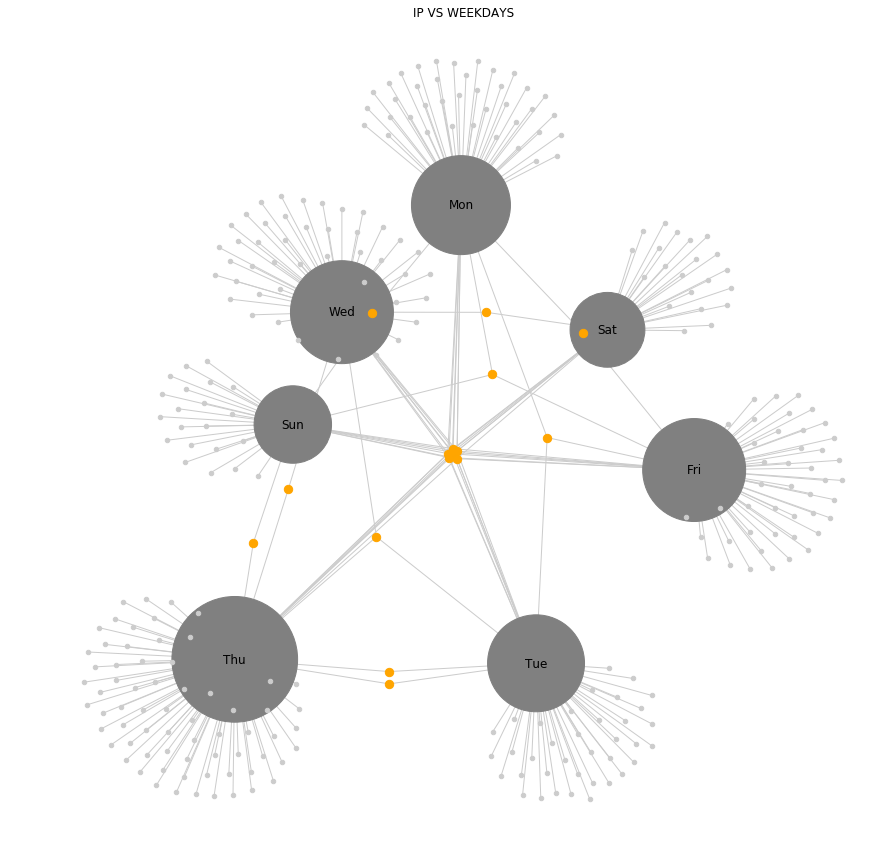

In [57]:
plt.figure(figsize=(15, 15))
g = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='weekday') 
layout = nx.spring_layout(g,seed=200)
week_size = [g.degree(weekday) * 200 for weekday in weekdays]
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=weekdays, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=ips, node_color='#cccccc', node_size=20)
popular_ips = [ip for ip in ips if g.degree(ip) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_ips, node_color='orange', node_size=70)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS WEEKDAYS")
plt.show()

In [58]:
plt.figure(figsize=(10, 10))
g1 = nx.from_pandas_edgelist(data_cat[0:500], source='weekday', target='ipcategory_scope') 
layout = nx.spring_layout(g1,seed=200)
week_size = [g1.degree(weekday) * 300 for weekday in ipcategory_scope]
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=ipcategory_scope, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=weekdays, node_color='#cccccc', node_size=70)
popular_week = [week for week in weekdays if g1.degree(week) > 0]
nx.draw_networkx_nodes(g1, layout, nodelist=popular_week, node_color='orange', node_size=1000)
nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ipcategory_scope, ipcategory_scope))
nx.draw_networkx_labels(g1, layout, labels=node_labels)

node_labels_week = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels_week)
plt.axis('off')
plt.title("WEEKDAYS VS IPCATEGORY_SCOPE")
plt.show()

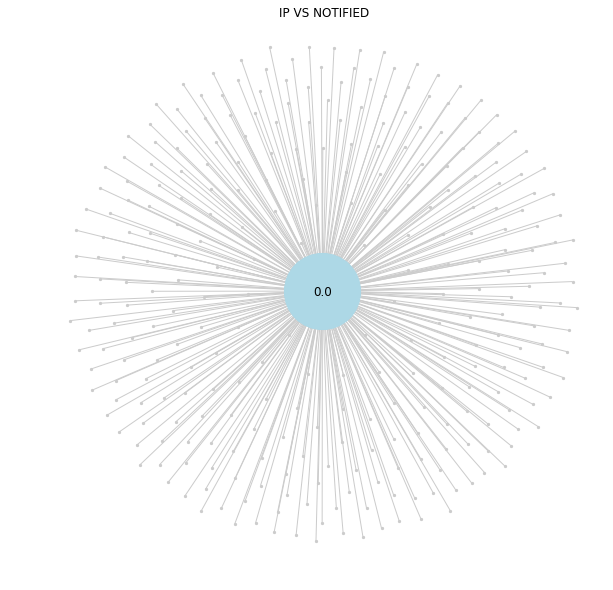

In [59]:
plt.figure(figsize=(10, 10))
g2 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='notified') 
layout = nx.spring_layout(g2)
notify_size = [g2.degree(notify) * 20 for notify in notify_cat]
nx.draw_networkx_nodes(g2, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='lightblue')
nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g2.degree(ip) > 1]
nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(notify_cat, notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)
plt.axis('off')
plt.title('IP VS NOTIFIED')
plt.show()

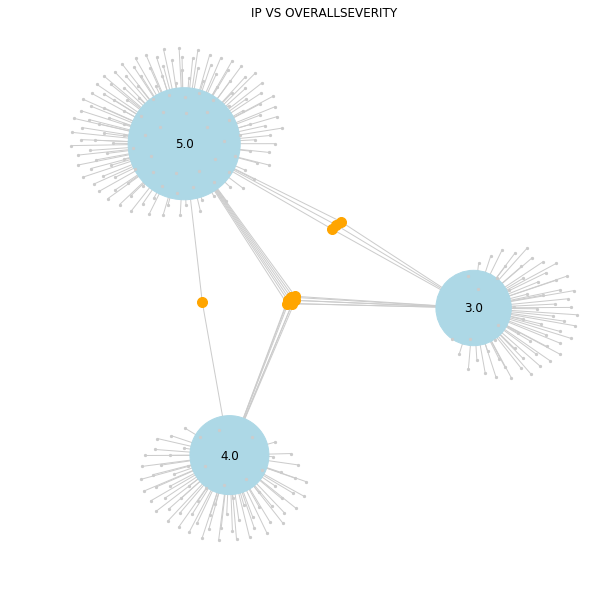

In [60]:
plt.figure(figsize=(10, 10))
g4 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='overallseverity') 
layout = nx.spring_layout(g4)
sever_size = [g4.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(g4,layout,with_labels=True, nodelist=overallseverity,  node_size=sever_size, node_color='lightblue')
nx.draw_networkx_nodes(g4, layout, with_labels=True,nodelist=ips, node_color='#cccccc', node_size=5)
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]
nx.draw_networkx_nodes(g4, layout ,with_labels=True, nodelist=popular_ip, node_color='orange', node_size=100)
nx.draw_networkx_edges(g4, layout, with_labels=True,width=1, edge_color="#cccccc")
node_labels = dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS OVERALLSEVERITY")
plt.show()

In [61]:
plt.figure(figsize=(14, 14))
g3 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='categoryname') 
layout = nx.spring_layout(g3)

nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ips, node_size=10, node_color='gray')
ip_cat_size = [g3.degree(ip) * 10 for ip in ip_cat_name]
nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=2)

popular_ips = [ip for ip in ip_cat_name if g3.degree(ip) > 3]
nx.draw_networkx_nodes(g3, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")
# node_labels = dict(zip(ips, ips))
# nx.draw_networkx_labels(g3, layout, labels=node_labels)

node_labels_scope = dict(zip(ip_cat_name, ip_cat_name))
nx.draw_networkx_labels(g3, layout, labels=node_labels_scope)
plt.axis('off')
plt.title("IP VS CATEGORYNAME")
plt.show()

# of edges: 1246
# of nodes: 312


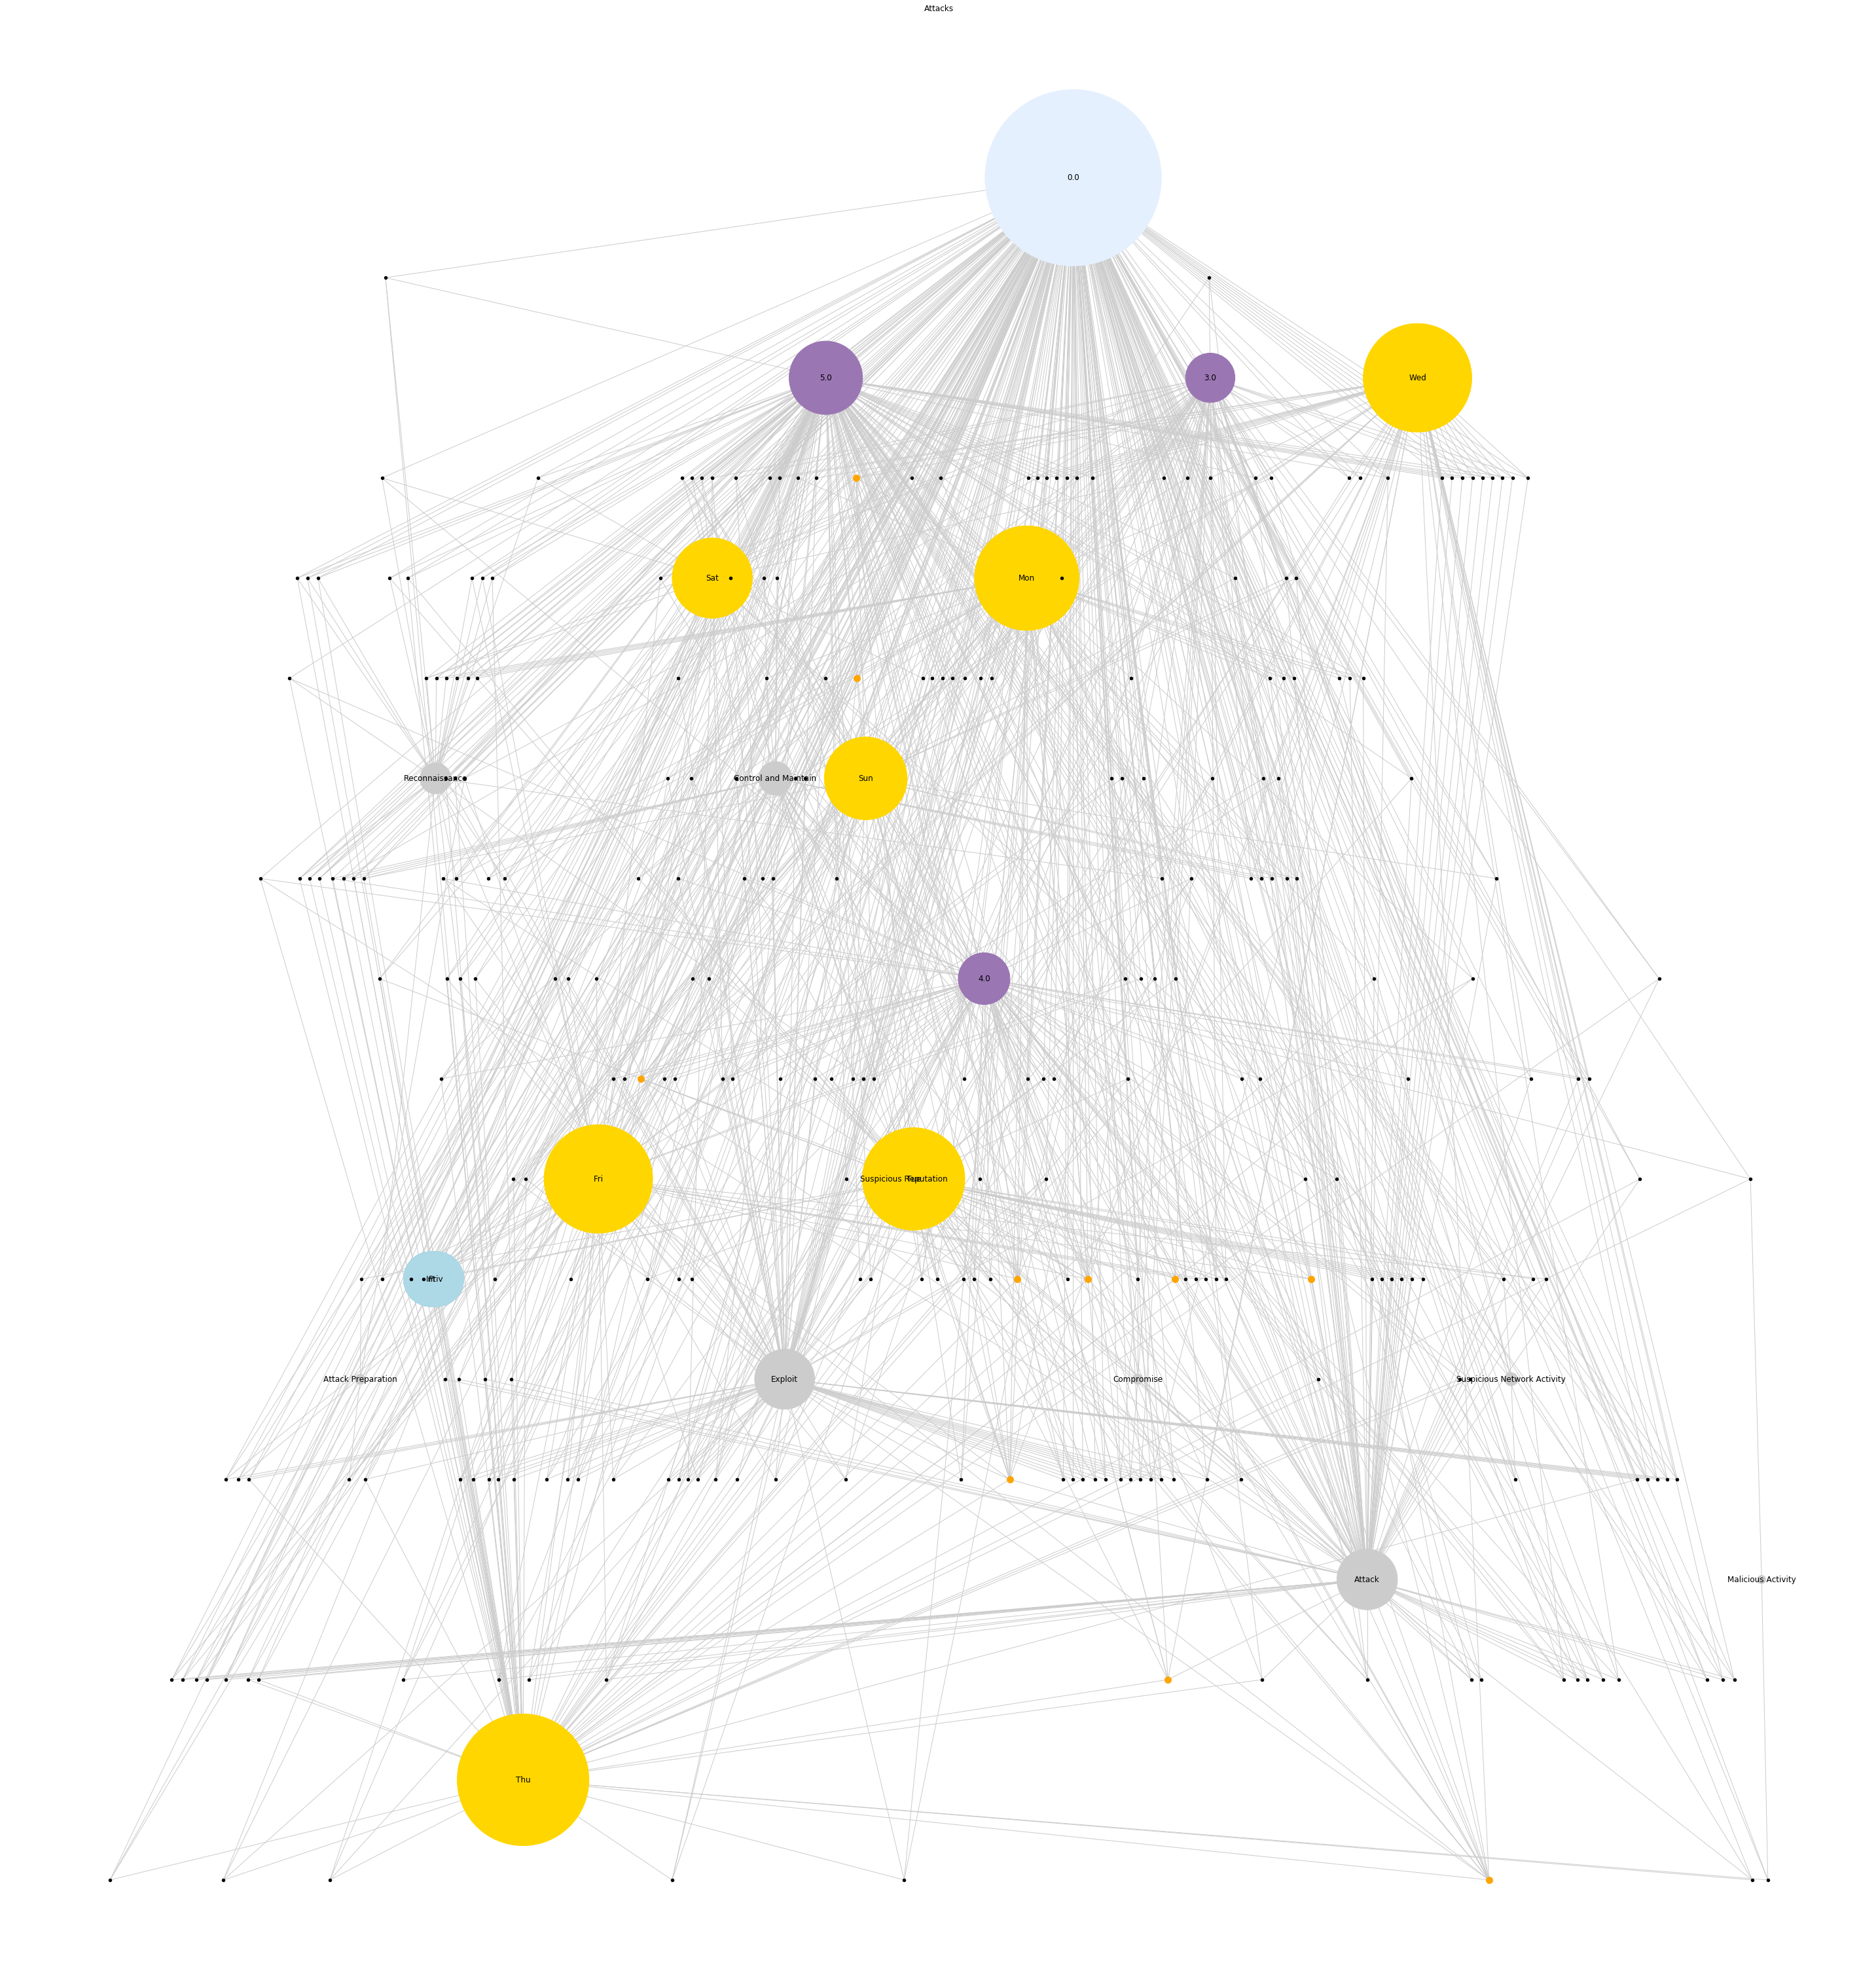

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 55))

F= nx.compose(g,g1)
G= nx.compose(F,g3)
H=nx.compose(G,g2)
J=nx.compose(H,g4)
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')



sever_size = [J.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(J,layout, nodelist=overallseverity,node_size=sever_size, node_color='#9A76B3')

ip_cat_size = [J.degree(cat) * 80 for cat in ip_cat_name]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=ip_cat_size)

ipscope_size = [J.degree(ipscope) * 1000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(J, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='lightblue')

week_size = [J.degree(weekday) * 500 for weekday in weekdays]
nx.draw_networkx_nodes(J,layout, with_labels=True, nodelist=weekdays, node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

notify_size = [J.degree(notify) * 250 for notify in notify_cat]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')
# # Draw EVERYONE

nx.draw_networkx_nodes(J, layout, nodelist=ips, node_color='black', node_size=20)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if J.degree(ip)>5]

nx.draw_networkx_nodes(J, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(J, layout,nodelist=ips, edge_color="#cccccc")

print('# of edges: {}'.format(J.number_of_edges()))
print('# of nodes: {}'.format(J.number_of_nodes()))
node_labels = dict(zip(ipcategory_scope,ipcategory_scope))
nx.draw_networkx_labels(J, layout, labels=node_labels)


node_labels_week= dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(J, layout, labels=node_labels_week,)
# # 4. Turn off the axis because I know you don't want it
node_labels_sever= dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(J, layout, labels=node_labels_sever)

node_labels_notify= dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(J, layout, labels=node_labels_notify)


node_labels_cat= dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(J, layout, labels=node_labels_cat)

plt.axis('off')
plt.title("Attacks")
# print("radius: %d" % nx.radius(G))
# print("diameter: %d" % nx.diameter(G))
# print("eccentricity: %s" % nx.eccentricity(G))
# print("center: %s" % nx.center(G))
# print("periphery: %s" % nx.periphery(G))
# print("density: %s" % nx.density(G))
# 5. Tell matplotlib to show it
plt.show()


In [ ]:
plt.figure(figsize=(100, 100))
f =nx.Graph()  
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')

notify_size = [J.degree(notify) * 500 for notify in notify_cat]
nx.draw_networkx_nodes(f, layout, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')

sever_size = [J.degree(sever) * 500 for sever in overallseverity]
nx.draw_networkx_nodes(f,layout, nodelist=overallseverity,node_size=sever_size, node_color='#cccccc')

ipscope_size = [J.degree(ipscope) * 2000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(f, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='orange')

week_size = [J.degree(weekday) * 1000 for weekday in weekdays]
nx.draw_networkx_nodes(f,
                       layout, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

# ip_cat_size = [J.degree(cat) * 500 for cat in ip_cat_name ]
# nx.draw_networkx_nodes(f, layout, nodelist=ip_cat_name, node_size=ip_cat_size, node_color='#E5999F')

fedges = filter(lambda x: J.degree()[x[0]] >6 and J.degree()[x[1]] >6, J.edges())

f.add_edges_from(fedges)

nx.draw(f,layout,edge_color="#cccccc",width=2,font_size=55,with_labels=True)


plt.axis('off')
# plt.savefig("Graph.png", format="PNG")
plt.show()
print('# of edges: {}'.format(f.number_of_edges()))
print('# of nodes: {}'.format(f.number_of_nodes()))